_____Histogram_____

histogram is a discrete function that returns number of occurance of each pixel. it's plot will be with  number of pixels and level intensity 

__Histogram Processing Techniques__

1. Sliding

in Histogram Sliding, the complete histogram is shifted towards rightward(more Brightness) or leftwards(more darkness).This Technique consists of simply adding or subtracting a contrast brightness value to all pixels in the image

In [5]:
#import Libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [19]:
img= cv2.imread('./imgs/11.jpg',flags=0)  # flags=0 => to read the image in the gray scale.

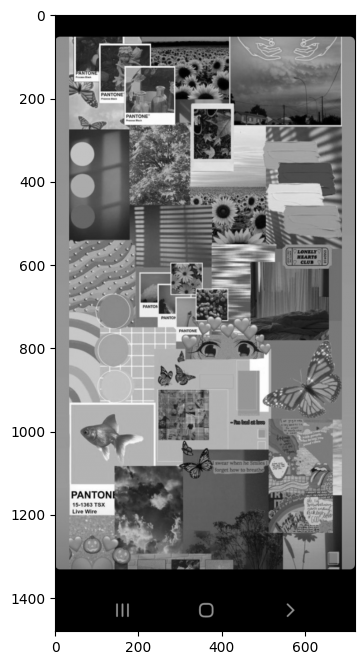

In [20]:
plt.figure(figsize=(6,8))
plt.imshow(img,cmap="gray")
plt.show()

To plot the histogram of any image we use plt.hist() function

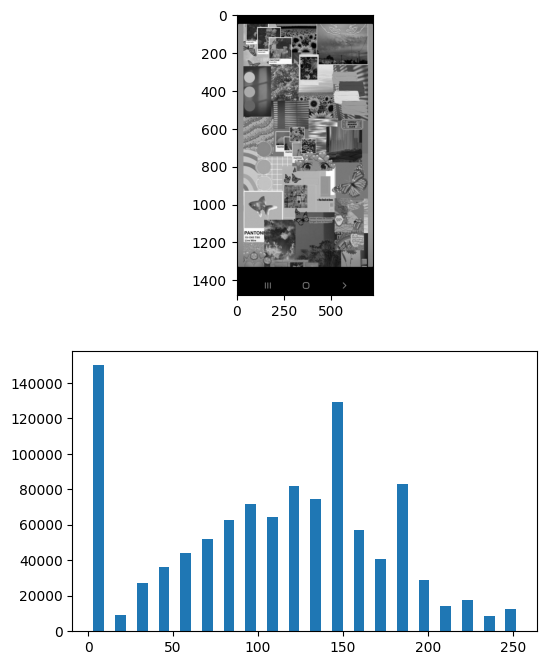

In [21]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)  # plt.subplot(#rows,#columns,#position) 
plt.imshow(img, cmap="gray")
plt.subplot(2,1,2)
plt.hist(img.reshape(-1,1),bins=20,rwidth=0.5)  # flaten the image into vector instead of a matrix
plt.show()

Defining _Histogram_sliding_ function to perform sliding

In [22]:
def Histogram_sliding(image, shift):
    fill=np.ones(shape=image.shape,dtype="uint8") * abs(shift)
    if shift > 0:
        return cv2.add(image,fill)
    else:
        return cv2.subtract(image,fill)

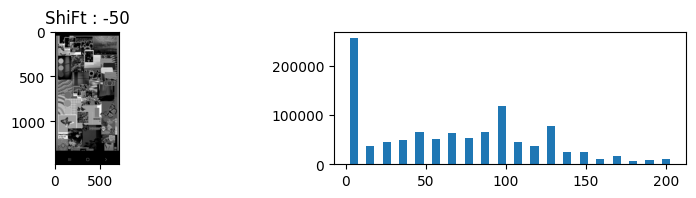

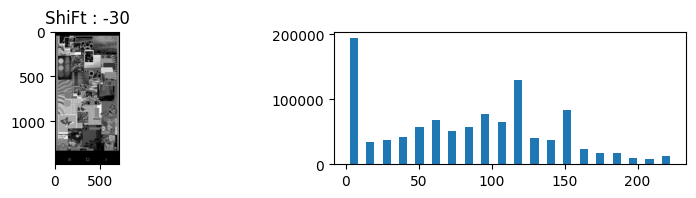

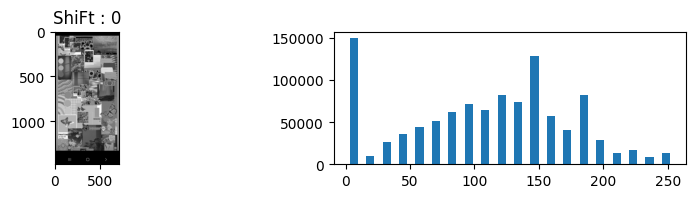

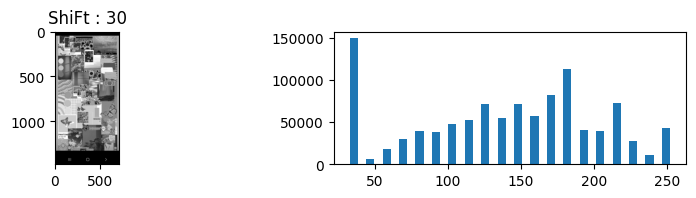

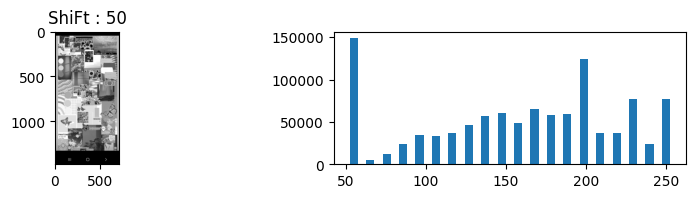

In [23]:
shifts=[-50,-30,0,30,50]
index=0
for shift in shifts:
    new_image=Histogram_sliding(img,shift) 
    index+=1
    plt.figure(figsize=(10,10))
    plt.subplot(5,2,index)
    plt.imshow(new_image,cmap='gray')
    plt.title(f"ShiFt : {shift}")
    index+=1
    plt.subplot(5,2, index)
    plt.hist(new_image.ravel(),bins=20,rwidth=0.5)
    plt.show()


2. __Histogram Stretching__

in histogram stretching, contrast of an image is increased . The contrast of the image is defined between the maximum amd minimum value of pixel intensity.

In [24]:
contrast=(256-1)/(img.max() - img.min())

In [25]:
stretched_img = contrast * img

Text(0.5, 1.0, 'stretched Image Histogram')

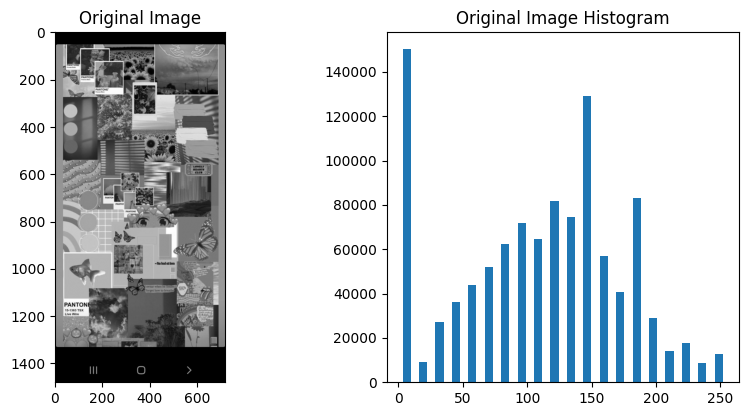

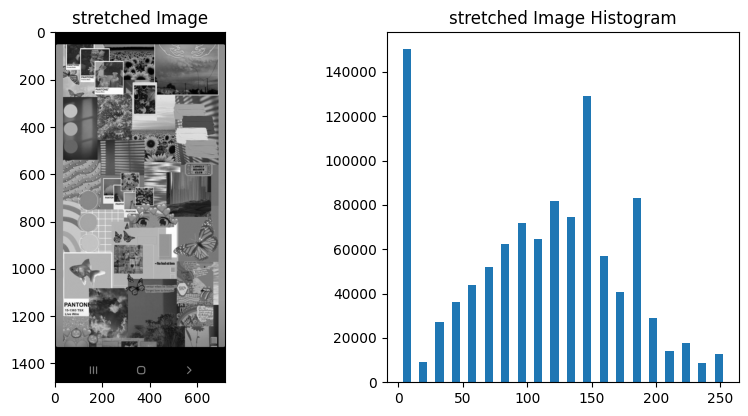

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title(f"Original Image")

plt.subplot(2,2,2)
plt.hist(img.ravel(),bins=20,rwidth=0.5)
plt.title(f"Original Image Histogram")

plt.figure(figsize=(10,10))

plt.subplot(2,2,3)
plt.imshow(stretched_img,cmap='gray')
plt.title(f"stretched Image")

plt.subplot(2,2,4)
plt.hist(stretched_img.ravel(),bins=20,rwidth=0.5)
plt.title(f"stretched Image Histogram")

3. __Histogram Equalization__

Histogram Equalization increases the dynamic range of pixel and makes an equal count of pixels at each level which produces a flat histogram with high contrast image.

The function that can do this is eualizeHist()

In [28]:
equalized_image=cv2.equalizeHist(img)

Text(0.5, 1.0, 'equalized Image Histogram')

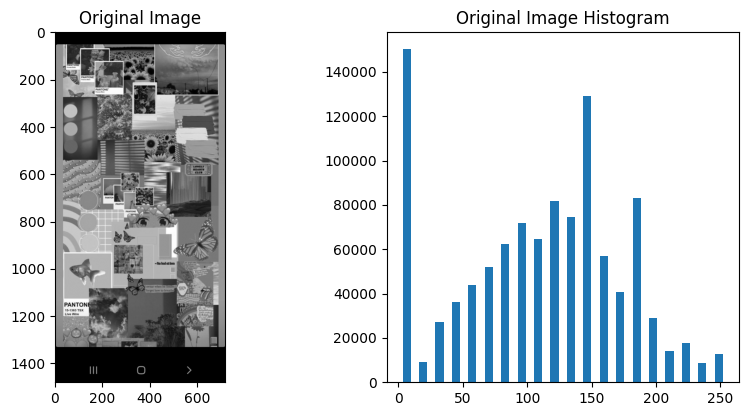

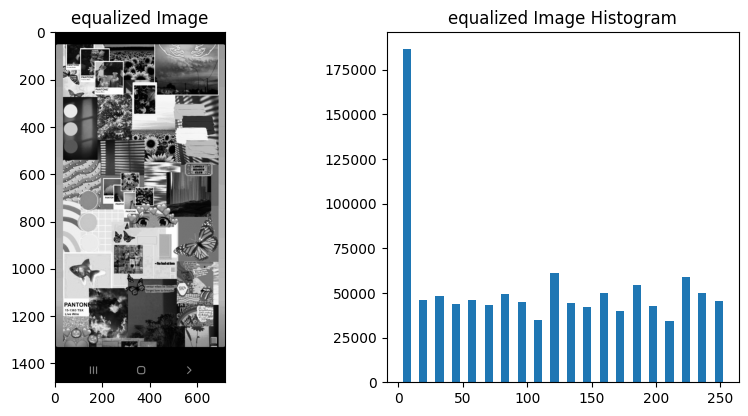

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title(f"Original Image")

plt.subplot(2,2,2)
plt.hist(img.ravel(),bins=20,rwidth=0.5,range=[0,255]) # Another way to flatten the image into vector
plt.title(f"Original Image Histogram")

plt.figure(figsize=(10,10))

plt.subplot(2,2,3)
plt.imshow(equalized_image,cmap='gray')
plt.title(f"equalized Image")

plt.subplot(2,2,4)
plt.hist(equalized_image.ravel(),bins=20,rwidth=0.5)
plt.title(f"equalized Image Histogram")